In [736]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ri = pd.read_csv('police.csv')
# (rows, columns)
print(ri.shape)
ri.dtypes

(91741, 15)


stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [737]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [738]:
# sum null values in all null columns
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [739]:
# 1. Remove the column that only contains missing values.
# inplace=False return copy
no_miss = ri.drop('county_name', axis='columns', inplace=False)
print(no_miss.shape)
no_miss.columns

(91741, 14)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [740]:
no_miss = ri.loc[:, (ri.isnull().sum() != ri.shape[0])]
print(no_miss.shape)
no_miss.columns

(91741, 14)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [741]:
no_miss = ri.dropna(axis='columns', how='all')
print(no_miss.shape)
no_miss.columns

(91741, 14)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [742]:
# 2. Do men or women speed more often?
(
    len(
        ri[
            (ri['driver_gender'] == 'M') 
            & (ri['violation'] == 'Speeding')
        ]
    ) / len(ri[ri['violation'] == 'Speeding']), 
    len(
        ri[
            (ri['driver_gender'] == 'F') 
            & (ri['violation'] == 'Speeding')
        ]
    ) / len(ri[ri['violation'] == 'Speeding'])
)

(0.6804985246476694, 0.3194602067556693)

In [743]:

ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [744]:
# male
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)


Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [745]:
# female
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [746]:
# male and female
gr_gender = ri.groupby('driver_gender').violation.value_counts(normalize=True)
gr_gender

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [747]:
# filter 'Speeding'
gr_gender.loc[:, 'Speeding']


driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [748]:
# stack
gr_gender.unstack().Speeding

driver_gender
F    0.65850
M    0.52435
Name: Speeding, dtype: float64

In [749]:
 # 3. Does gender affect who gets searched during a stop?
ri.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [750]:
# 3% searched
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [751]:
# mean
ri.search_conducted.mean()

0.03483720473942948

In [752]:
# mean by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [753]:
# search correlation violation and search_conducted
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()


violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [754]:
# 4. Why search_type missing so often?
# dropna = True by default 
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [755]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [756]:
ri.search_conducted.value_counts(dropna=False)

False    88545
True      3196
Name: search_conducted, dtype: int64

In [757]:
# search_type = NaN and search_conducted = False
ri.loc[:, ['search_type', 'search_conducted']].value_counts(dropna=False)

search_type                                               search_conducted
NaN                                                       False               88545
Incident to Arrest                                        True                 1219
Probable Cause                                            True                  891
Inventory                                                 True                  220
Reasonable Suspicion                                      True                  197
Protective Frisk                                          True                  161
Incident to Arrest,Inventory                              True                  129
Incident to Arrest,Probable Cause                         True                  106
Probable Cause,Reasonable Suspicion                       True                   75
Incident to Arrest,Inventory,Probable Cause               True                   34
Incident to Arrest,Protective Frisk                       True                   33
P

In [758]:
# 5. During search how often is the driver frisked?
# Protective Frisk
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

print(f'mean: {ri.frisk.mean()}')
# smell test
print(f'mean: {ri.frisk.value_counts()[True] / ri.search_type.count()}')
ri.frisk.value_counts(dropna=False)


mean: 0.08573216520650813
mean: 0.08573216520650813


NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [759]:
# 6. Which year had the least number of stops?
print(ri.stop_date.str.split('-').apply(lambda x: x[0]).value_counts())
print(ri.stop_date.str.slice(0,4).value_counts())

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64
2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64


In [760]:
# combine columns
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
# get from sorted stop_datetime
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

In [761]:
# 7. How does drug activity change by time of day?
ri['hour'] = ri.stop_datetime.dt.hour
ri.groupby('hour').drugs_related_stop.value_counts().sort_values()

hour  drugs_related_stop
5     True                     1
4     True                     3
6     True                    10
8     True                    14
7     True                    15
17    True                    16
12    True                    16
21    True                    20
3     True                    20
18    True                    22
16    True                    22
20    True                    27
19    True                    30
15    True                    31
11    True                    41
10    True                    42
9     True                    43
14    True                    44
2     True                    46
22    True                    47
13    True                    50
1     True                    60
23    True                    92
0     True                   103
5     False                  209
4     False                  251
3     False                 1152
21    False                 1479
18    False                 2146
19    False       

In [762]:
# less 1%
ri.drugs_related_stop.mean()

0.008883705213590434

<Axes: xlabel='stop_datetime'>

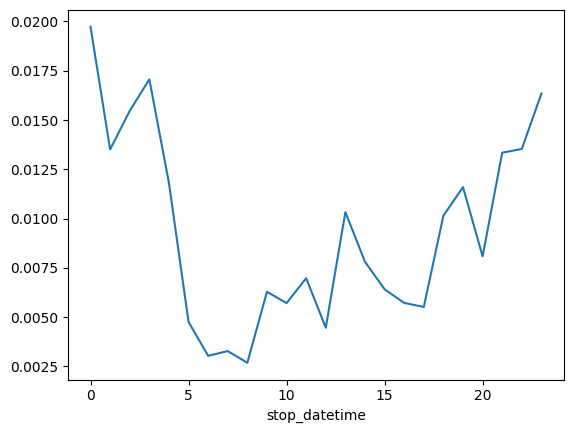

In [763]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

<Axes: >

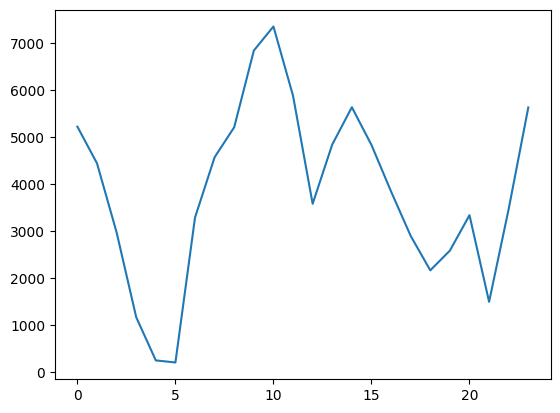

In [764]:
# 8. Do most stops occur at night?
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [765]:
# inclusive
ri.groupby(ri.stop_datetime.dt.hour.between(0, 8)).stop_datetime.count()


stop_datetime
False    64395
True     27346
Name: stop_datetime, dtype: int64

In [766]:
ri[(ri.hour >= 0) & (ri.hour <= 8)].stop_datetime.count()


27346

In [767]:
# 9. Find the bad data in the stop_duration column and fix it.
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [768]:
# parethensis for each condition
# ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = None
# 'NaN' is not a string
ri.loc[
    (ri.stop_duration == '1') | (ri.stop_duration == '2'), 
    'stop_duration'
] = 'NaN'

In [769]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [770]:
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [771]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64